# 전세계 음주 데이터 분석하기

# <1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

-----

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
#drinks.head()
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# <2. 탐색과 시각화 >

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [5]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


##### [여러 피처의 상관관계 분석]

In [6]:
# 피처간의 상관계수 행렬
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


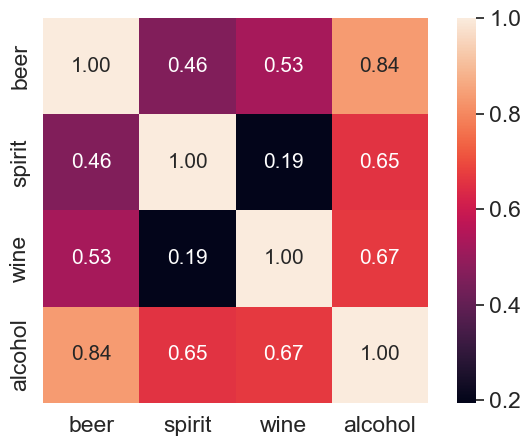

In [7]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()



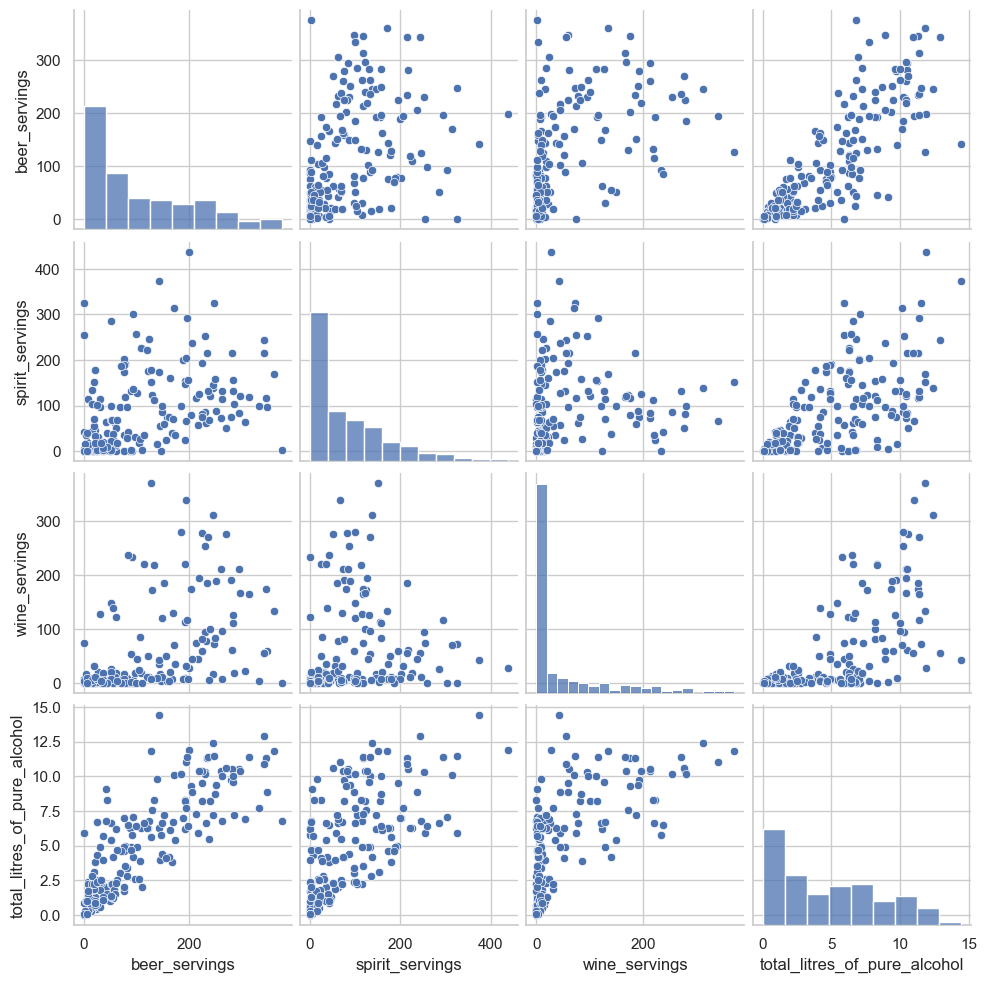

In [8]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

# <3. 탐색적 분석> 

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

-----

In [10]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [11]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [12]:
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [13]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


##### 파이차트 시각화

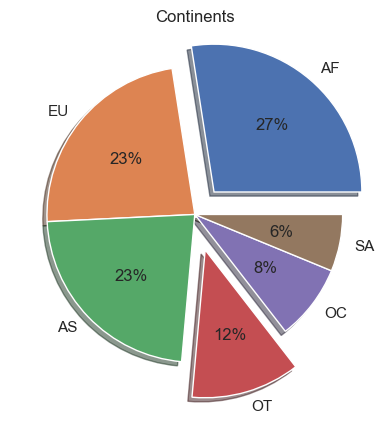

In [14]:
labels = drinks['continent'].value_counts().index.tolist()
fracs  = drinks['continent'].value_counts().values.tolist()
explode = [0.2, 0, 0, 0.25,0, 0]
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('Continents')
plt.show()

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [15]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [16]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean()

continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent__over_mean = continent_mean[continent_mean > total_mean]
continent__over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [17]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

##### 분석 결과에 대한 시각화

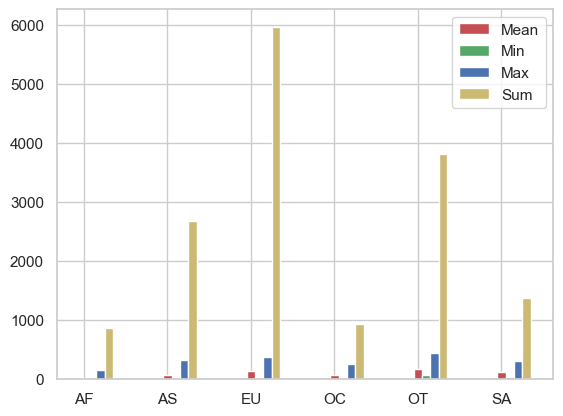

[0 1 2 3 4 5]


In [18]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')

plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')

plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()
print(index)

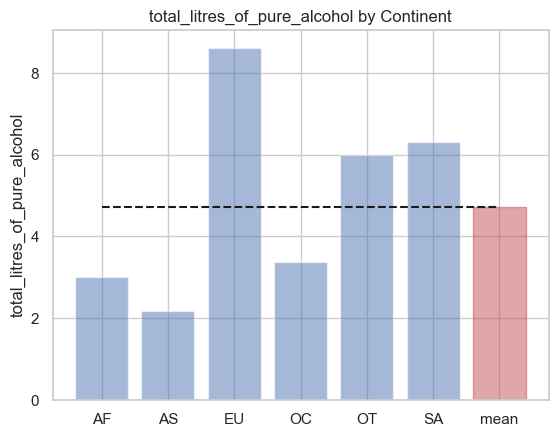

In [18]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

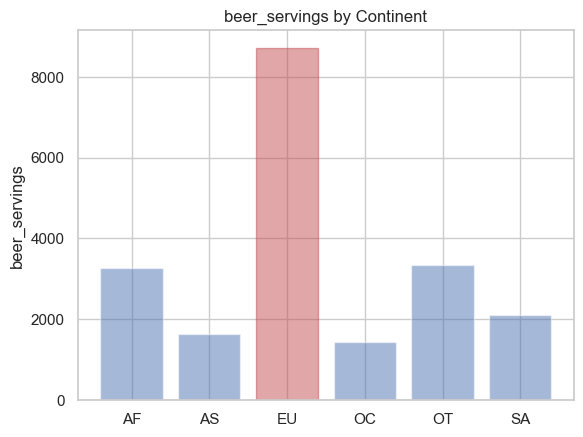

In [19]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

-----

In [20]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.


In [21]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.


-----

# <4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기

### [아프리카와 유럽간의 맥주 소비량 차이 검정하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install scipy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [19]:
!pip install scipy

In [23]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.


# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [20]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [23]:
# total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
# 술 소비량 대비 알콜 비율 피처를 생성
drinks['alchole_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alchole_rate'] = drinks['alchole_rate'].fillna(0)
# 순위 정보를 생성
country_with_rank = drinks[['country', 'alchole_rate']]
country_with_rank = country_with_rank.sort_values(by='alchole_rate', ascending=False)
country_with_rank.head(10)

,country,alchole_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


In [24]:
country_with_rank[country_with_rank['country'] == 'South Korea']

,country,alchole_rate
138,South Korea,0.059394


In [32]:
country_with_rank.set_index('country').index.tolist().index('South Korea')

14

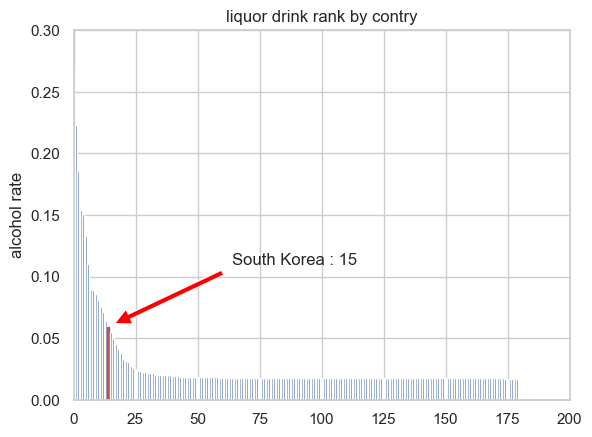

In [33]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alchole_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alchole_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 50, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [34]:
country_list

['Gambia',
 'Sierra Leone',
 'Nigeria',
 'Uganda',
 'Rwanda',
 'Tanzania',
 'Burkina Faso',
 'Central African Republic',
 "Cote d'Ivoire",
 'Mali',
 'Sudan',
 'Malawi',
 'Burundi',
 'DR Congo',
 'South Korea',
 'Zimbabwe',
 'Swaziland',
 'Zambia',
 'Ghana',
 'Cameroon',
 'Laos',
 'Guinea-Bissau',
 'Ethiopia',
 'Eritrea',
 'Belarus',
 'Lesotho',
 'Japan',
 'Chad',
 'Togo',
 'Botswana',
 'Kenya',
 'Benin',
 'South Africa',
 'New Zealand',
 'Finland',
 'Lithuania',
 'Comoros',
 'Saudi Arabia',
 'Estonia',
 'Congo',
 'United Kingdom',
 'Ireland',
 'Australia',
 'Argentina',
 'Slovakia',
 'Latvia',
 'Mozambique',
 'Cabo Verde',
 'Angola',
 'Sri Lanka',
 'Portugal',
 'Ukraine',
 'France',
 'Guinea',
 'Egypt',
 'Nepal',
 'Norway',
 'St. Lucia',
 'Dominica',
 'Sweden',
 'Jamaica',
 'Spain',
 'Singapore',
 'Paraguay',
 'Azerbaijan',
 'Switzerland',
 'Bahamas',
 'Turkmenistan',
 'Armenia',
 'Vanuatu',
 'Qatar',
 'Haiti',
 'Cook Islands',
 'Montenegro',
 'Sao Tome & Principe',
 'Oman',
 'Algeria'

-----

# 실습
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [35]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT')

-----

### [대륙별 평균 wine_servings 탐색]

In [36]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [37]:
drinks.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

### [국가별 total_servings 피처 생성]

In [38]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

In [39]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


### [전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기]

In [40]:
drinks[drinks['total_litres_of_pure_alcohol'].mean() > drinks['total_litres_of_pure_alcohol']].spirit_servings.idxmax()

134

In [42]:
drinks['country'].iloc[drinks[drinks['total_litres_of_pure_alcohol'].mean() > drinks['total_litres_of_pure_alcohol']].spirit_servings.idxmax()]

'Philippines'

### [술 소비량 대비 알콜 비율 구하기]

In [43]:
drinks.total_litres_of_pure_alcohol.sum() / drinks.total_servings.sum()

0.01993649403262893

### [대륙별 술 소비량 대비 알콜 비율 구하기]

In [44]:
drinks['술 소비량 대비 알콜 비율'] = drinks.total_litres_of_pure_alcohol / drinks.total_servings

In [46]:
drinks = drinks.fillna(0)

In [49]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,술 소비량 대비 알콜 비율
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
5,Antigua & Barbuda,102,128,45,4.9,OT,275,0.017818
6,Argentina,193,25,221,8.3,SA,439,0.018907
7,Armenia,21,179,11,3.8,EU,211,0.018009
8,Australia,261,72,212,10.4,OC,545,0.019083
9,Austria,279,75,191,9.7,EU,545,0.017798
